# **What is the richest Neighborhood in Pittsburgh?**

## We acquired the aggregate income of every neighborhood in Pittsburgh to find out

<AxesSubplot:>

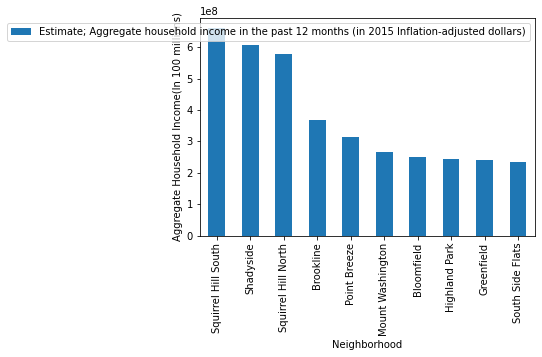

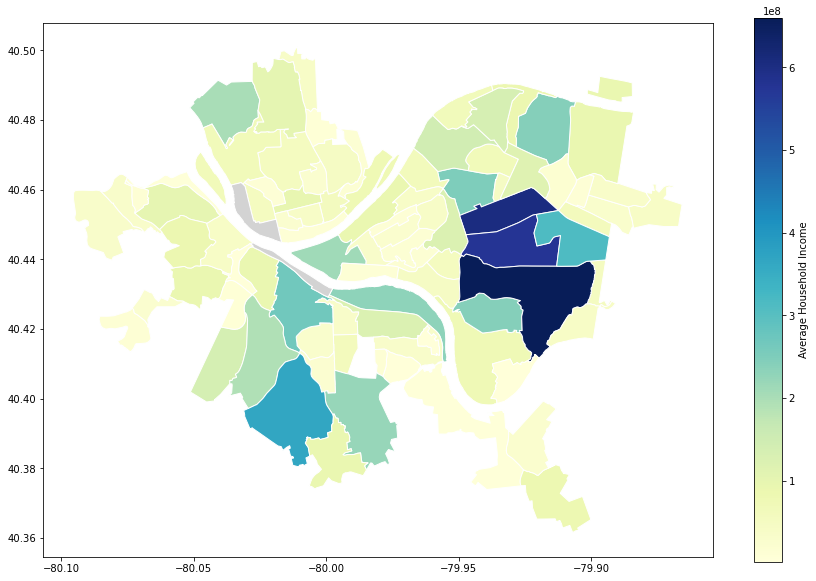

In [1]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
# load data
income = pd.read_csv("data/aggregatehouseholdincome.csv", index_col="Id") # use the column named _id as the row index

#print(income[income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"]=='-'])
#Drop broken numbers from income list
income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"] = pd.to_numeric(income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"], errors='coerce')
income = income.dropna(subset=["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"])
income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"] = income["Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"].astype(int)

#Mapping the top 10 earners
income.nlargest(10, "Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)").plot(kind='bar', x='Neighborhood', ylabel="Aggregate Household Income(In 100 millions)")

#ADDING THE MAP
neighborhoods = geopandas.read_file("data/Neighborhoods/Neighborhoods_.shp") # read in the shapefile
#neighborhoods.plot() # plot the geopandas dataframe

incomemap = neighborhoods.merge(income, how='left', left_on='hood', right_on="Neighborhood")
incomemap[['hood',"Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)",'geometry']].head()

incomemap.plot(column="Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)", cmap='YlGnBu', edgecolor='white', legend=True,
             legend_kwds={"label": "Average Household Income"}, figsize=(15, 10), missing_kwds={"color": "lightgrey"})

## **What can we conclude?**

* ### Squirrel Hill South is by far the richest neighborhood in Pittsburgh

* #### WatchMojo top 10 below

1. Squirrel Hill South
2. Shadyside
3. Squirrel Hill North
4. Brookline
5. Point Breeze
6. Mount Washington
7. Bloomfield
8. Highland Park
9. Greenfield
10. South Side Flats